In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### B. Titanic-https://www.kaggle.com/c/titanic/data
Database of whether somebody survived or not
Can you infer who has survived ?
(Given tasks)
1. Load the data
2. Which gender survived more 
3. Does it depend on pclass?
4. can we see % of survival of each gender and pclass 
What is your inference? 

## 1.Load the data

In [5]:
path = r"desktop\handson\code\data\titanic_train.csv"
titanic = pd.read_csv(path)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

## 2. Which gender survived more

In [10]:
survived_more= titanic.groupby('sex').agg({'sex':'count', 'survived':'sum'})
survived_more

,sex,survived
sex,,
female,314,233
male,577,109


## Ans :Female gender survived more.

## 3.Does it depend on pclass?

In [34]:
pclass_vs_survial = titanic.groupby('pclass').agg({'survived':'sum'})
pclass_vs_survial

,survived
pclass,
1,136
2,87
3,119


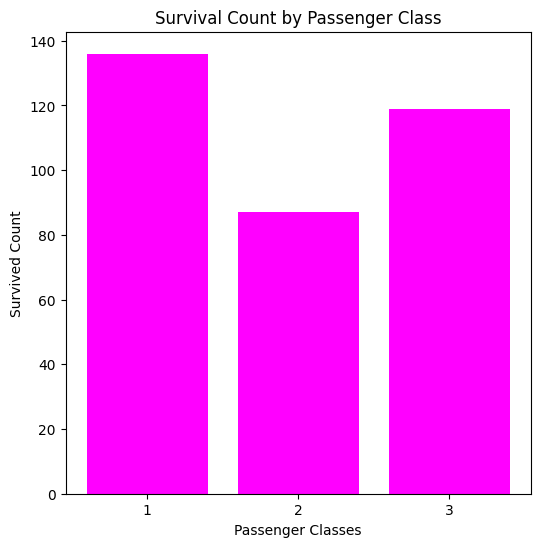

In [19]:

plt.figure(figsize=(6,6))
plt.bar(pclass_vs_survial.index,pclass_vs_survial.survived,color="Magenta")
plt.xticks([1, 2, 3])
plt.xlabel('Passenger Classes')
plt.ylabel('Survived Count')
plt.title('Survival Count by Passenger Class')
plt.show()

## 4.can we see % of survival of each gender and pclass What is your inference?

### % of survival of each gender

In [35]:
survived_more = titanic.groupby('sex').agg({'sex': 'count', 'survived': 'sum'})
survived_more.rename(columns={'sex': 'total', 'survived': 'survived'}, inplace=True)
survived_more['%survival'] = round(survived_more['survived']/survived_more['total']*100,2)
survived_more

,total,survived,%survival
sex,,,
female,314,233,74.20
male,577,109,18.89


### % of survival of each pclass

In [38]:
pclass_vs_survived = titanic.groupby(['pclass']).agg({'pclass':'sum','survived':'sum'})
pclass_vs_survived.columns = ['total','survived']
pclass_vs_survived['%surival'] = round(pclass_vs_survived['survived']/pclass_vs_survived['total']*100,2)
pclass_vs_survived

,total,survived,%surival
pclass,,,
1,216,136,62.96
2,368,87,23.64
3,1473,119,8.08


 # Inference:

#### Survival on the Titanic was heavily influenced by gender. Females had a survival rate of 74.20%, while males had only 18.89%. 

#### And also the survival rate on the Titanic significantly varied by passenger class. First-class passengers had the highest survival rate at 62.96%, followed by second-class at 23.64%, and third-class at only 8.08%. This indicates that higher-class passengers had a much better chance of survival, likely due to better access to lifeboats.